In [1]:
import pandas as pd
import re as re
import html

In [2]:
f1=pd.read_excel("C:\\Users\\tarun\\Downloads\\Sample Data\\Sample Data\\Threads.xlsx")

In [3]:
f2=pd.read_excel("C:\\Users\\tarun\\Downloads\\Sample Data\\Sample Data\\Incidents.xlsx")

In [4]:
f1.head(2)

,Threads,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Foreign Key,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
1,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer


In [5]:
f2.head(2)

,Incidents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,Product ID,Organisation ID,Date Closed,Date Created,Contact ID,Category ID
1,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value


In [6]:
header_row=0
f1.columns = f1.iloc[header_row]
f2.columns = f2.iloc[header_row]
f1=f1.drop(header_row)
f2=f2.drop(header_row)

In [7]:
f1.head()

,Foreign Key,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
1,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer
2,2632,2809,No Value,No Value,05/11/2010 09:50,1983,CSS Web,No Value,1,5,Agents are experiencing an issue with Rightnow...,Customer
3,2601,2839,Stephen Pickett,No Value,11/01/2011 11:58,0,No Value,No Value,1,0,"Ad, see the attachment.",Note
4,2655,2842,No Value,No Value,12/01/2011 10:36,1243,CSS Web,No Value,1,-2,the phone display states \nNo service\nTrying ...,Customer
5,2655,2843,Alan Cheng,No Value,12/01/2011 11:02,0,Email,No Value,1,-48,"Had a look, appears to be a network port issue...",Staff Account


In [8]:
f2.head()

,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,Product ID,Organisation ID,Date Closed,Date Created,Contact ID,Category ID
1,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value
2,101004-000000,2601,Adam Wilkinson,No Value,Solved,Solved,Measuring effectiveness increases effectiveness,No Value,29,11/01/2011 12:07,04/10/2010 09:22,402,No Value
3,101102-000000,2619,Stephen Pickett,No Value,Solved,Solved,Infoco Answer Export Tool,RightNow,560,02/11/2010 12:05,02/11/2010 12:05,2157,No Value
4,101102-000001,2620,Chris Farmer,Medium,Solved,Solved,THA: The Family Information Direct/Helplines S...,No Value,562,24/02/2011 13:56,02/11/2010 12:46,2144,No Value
5,101105-000000,2632,Alan Cheng,Medium,Solved,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing,473,16/02/2011 15:09,05/11/2010 09:50,1983,No Value


In [9]:
f1.rename(columns={'Foreign Key':'Incident ID'}, inplace=True)

In [10]:
f3=f1[["Incident ID","Text"]].merge(f2[["Incident ID","Status","Subject","Product ID"]],on="Incident ID",how="left")

In [11]:
f3.head(2)

,Incident ID,Text,Status,Subject,Product ID
0,2601,\n\n==================== text File Attachment ...,Solved,Measuring effectiveness increases effectiveness,No Value
1,2632,Agents are experiencing an issue with Rightnow...,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing


In [12]:
f3.shape

(100000, 5)

In [13]:
f3.head(30)

,Incident ID,Text,Status,Subject,Product ID
0,2601,\n\n==================== text File Attachment ...,Solved,Measuring effectiveness increases effectiveness,No Value
1,2632,Agents are experiencing an issue with Rightnow...,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing
2,2601,"Ad, see the attachment.",Solved,Measuring effectiveness increases effectiveness,No Value
3,2655,the phone display states \nNo service\nTrying ...,Solved,Phone on Mandy's desk not working,Other
4,2655,"Had a look, appears to be a network port issue...",Solved,Phone on Mandy's desk not working,Other
5,2666,I have come into work this evening to find tha...,Solved,No Access to Rightnow on my computer,Other
6,2666,"Hi Paddy,\n\nI've called you a number of times...",Solved,No Access to Rightnow on my computer,Other
7,2666,"Hi Steve, It’s all been sorted out with Alan’s...",Solved,No Access to Rightnow on my computer,Other
8,2666,I have talked Paddy through setting up Rightno...,Solved,No Access to Rightnow on my computer,Other
9,2669,"Hiya, Can you re-install BTB Right now for me ...",Solved,BTB Right Now,Other


In [14]:
f3=f3[f3['Product ID']!='No Value']

In [15]:
f3["Text"]=f3["Subject"]+" "+f3["Text"]

In [16]:
f3.shape

(98083, 5)

In [17]:
f3.head(10)

,Incident ID,Text,Status,Subject,Product ID
1,2632,incident screen freezing incident - Ref 100924...,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing
3,2655,Phone on Mandy's desk not working the phone di...,Solved,Phone on Mandy's desk not working,Other
4,2655,"Phone on Mandy's desk not working Had a look, ...",Solved,Phone on Mandy's desk not working,Other
5,2666,No Access to Rightnow on my computer I have co...,Solved,No Access to Rightnow on my computer,Other
6,2666,"No Access to Rightnow on my computer Hi Paddy,...",Solved,No Access to Rightnow on my computer,Other
7,2666,"No Access to Rightnow on my computer Hi Steve,...",Solved,No Access to Rightnow on my computer,Other
8,2666,No Access to Rightnow on my computer I have ta...,Solved,No Access to Rightnow on my computer,Other
9,2669,"BTB Right Now Hiya, Can you re-install BTB Rig...",Solved,BTB Right Now,Other
10,2669,"BTB Right Now Hi Kinga,\n\nyou can install BTB...",Solved,BTB Right Now,Other
11,2670,Laptop Cal019 I am still unable to hear voicem...,Solved,Laptop Cal019,Other


In [18]:
print(f3["Text"])

1        incident screen freezing incident - Ref 100924...
3        Phone on Mandy's desk not working the phone di...
4        Phone on Mandy's desk not working Had a look, ...
5        No Access to Rightnow on my computer I have co...
6        No Access to Rightnow on my computer Hi Paddy,...
                               ...                        
99995    Odd Reporting Request Hi, \n\nThanks for this,...
99996    Shaw Healthcare CRM Access Hello, \n\nPlease c...
99997    Shaw Healthcare CRM Access <div>\n<div><span>H...
99998    Ellis visibility Hi Kayleigh,\n\nUnfortunately...
99999    Sharepoint - The Benevolent <div>Dear Francine...
Name: Text, Length: 98083, dtype: object


In [19]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

In [20]:
f3["Text"]=f3["Text"].apply(lambda cw: remove_tags(cw))

In [21]:
print(f3["Text"])

1        incident screen freezing incident - Ref 100924...
3        Phone on Mandy's desk not working the phone di...
4        Phone on Mandy's desk not working Had a look, ...
5        No Access to Rightnow on my computer I have co...
6        No Access to Rightnow on my computer Hi Paddy,...
                               ...                        
99995    Odd Reporting Request Hi, \n\nThanks for this,...
99996    Shaw Healthcare CRM Access Hello, \n\nPlease c...
99997    Shaw Healthcare CRM Access \nHi Dem,\n&nbsp;\n...
99998    Ellis visibility Hi Kayleigh,\n\nUnfortunately...
99999    Sharepoint - The Benevolent Dear Francine,\n\n...
Name: Text, Length: 98083, dtype: object


In [22]:
f3['Text']=f3['Text'].str.replace('\n','').str.replace('=','')

In [23]:
print(f3["Text"])

1        incident screen freezing incident - Ref 100924...
3        Phone on Mandy's desk not working the phone di...
4        Phone on Mandy's desk not working Had a look, ...
5        No Access to Rightnow on my computer I have co...
6        No Access to Rightnow on my computer Hi Paddy,...
                               ...                        
99995    Odd Reporting Request Hi, Thanks for this, I n...
99996    Shaw Healthcare CRM Access Hello, Please can I...
99997    Shaw Healthcare CRM Access Hi Dem,&nbsp;That&#...
99998    Ellis visibility Hi Kayleigh,Unfortunately, we...
99999    Sharepoint - The Benevolent Dear Francine,We a...
Name: Text, Length: 98083, dtype: object


In [24]:
def decode_text(string):
    result = html.unescape(string)
    return result

In [25]:
f3["Text"]=f3["Text"].apply(lambda cw: decode_text(cw))

In [26]:
print(f3["Text"])

1        incident screen freezing incident - Ref 100924...
3        Phone on Mandy's desk not working the phone di...
4        Phone on Mandy's desk not working Had a look, ...
5        No Access to Rightnow on my computer I have co...
6        No Access to Rightnow on my computer Hi Paddy,...
                               ...                        
99995    Odd Reporting Request Hi, Thanks for this, I n...
99996    Shaw Healthcare CRM Access Hello, Please can I...
99997    Shaw Healthcare CRM Access Hi Dem, That's been...
99998    Ellis visibility Hi Kayleigh,Unfortunately, we...
99999    Sharepoint - The Benevolent Dear Francine,We a...
Name: Text, Length: 98083, dtype: object


In [27]:
f3['Text'] = f3['Text'].replace(r'https?:\/\/.\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [28]:
f3["Text"]=f3["Text"].str.lower()

In [29]:
print(f3["Text"])

1        incident screen freezing incident - ref 100924...
3        phone on mandy's desk not working the phone di...
4        phone on mandy's desk not working had a look, ...
5        no access to rightnow on my computer i have co...
6        no access to rightnow on my computer hi paddy,...
                               ...                        
99995    odd reporting request hi, thanks for this, i n...
99996    shaw healthcare crm access hello, please can i...
99997    shaw healthcare crm access hi dem, that's been...
99998    ellis visibility hi kayleigh,unfortunately, we...
99999    sharepoint - the benevolent dear francine,we a...
Name: Text, Length: 98083, dtype: object


In [30]:
Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will","'d":" would","'ve":" have","'re":" are"}
def contraction_text(string):
    for key,value in Apos_dict.items():
        if key in string:
            result=string.replace(key,value)
            return result
        else:
            return string

In [31]:
f3["Text"]=f3["Text"].apply(lambda cw: contraction_text(cw))

In [32]:
print(f3["Text"])

1        incident screen freezing incident - ref 100924...
3        phone on mandy is desk not working the phone d...
4        phone on mandy is desk not working had a look,...
5        no access to rightnow on my computer i have co...
6        no access to rightnow on my computer hi paddy,...
                               ...                        
99995    odd reporting request hi, thanks for this, i n...
99996    shaw healthcare crm access hello, please can i...
99997    shaw healthcare crm access hi dem, that is bee...
99998    ellis visibility hi kayleigh,unfortunately, we...
99999    sharepoint - the benevolent dear francine,we a...
Name: Text, Length: 98083, dtype: object


In [33]:
def space_text(string):
    result=string.strip()
    return result

In [34]:
f3["Text"]=f3["Text"].apply(lambda cw: space_text(cw))

In [35]:
def punction_text(string):
    result = re.sub(r'[^\w\s]', '', string)
    return result

In [36]:
#removing punctions
f3["Text"]=f3["Text"].apply(lambda cw: punction_text(cw))

In [37]:
print(f3["Text"])

1        incident screen freezing incident  ref 1009240...
3        phone on mandy is desk not working the phone d...
4        phone on mandy is desk not working had a look ...
5        no access to rightnow on my computer i have co...
6        no access to rightnow on my computer hi paddyi...
                               ...                        
99995    odd reporting request hi thanks for this i nee...
99996    shaw healthcare crm access hello please can i ...
99997    shaw healthcare crm access hi dem that is been...
99998    ellis visibility hi kayleighunfortunately were...
99999    sharepoint  the benevolent dear francinewe are...
Name: Text, Length: 98083, dtype: object


In [38]:
f3.shape

(98083, 5)

In [39]:
pattern = r'[0-9]'
def nums_text(string):
    result=re.sub(pattern, '', string)
    return result

In [40]:
f3["Text"]=f3["Text"].apply(lambda cw: nums_text(cw))

In [41]:
f3.head()

,Incident ID,Text,Status,Subject,Product ID
1,2632,incident screen freezing incident ref agents...,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing
3,2655,phone on mandy is desk not working the phone d...,Solved,Phone on Mandy's desk not working,Other
4,2655,phone on mandy is desk not working had a look ...,Solved,Phone on Mandy's desk not working,Other
5,2666,no access to rightnow on my computer i have co...,Solved,No Access to Rightnow on my computer,Other
6,2666,no access to rightnow on my computer hi paddyi...,Solved,No Access to Rightnow on my computer,Other


In [42]:
f3.describe()

,Incident ID,Text,Status,Subject,Product ID
count,98083,98083,98083,98083,98083
unique,15542,96060,3,12474,92
top,14534,service alert migrant help no callschats ans...,Solved,Service Alert - Migrant Help - No Calls/Chats ...,Other
freq,208,89,97862,372,18061


In [43]:
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [44]:
f3['pro_id'] = f3['Product ID'].factorize()[0]
category_id_f2 = f3[['Product ID', 'pro_id']].drop_duplicates()

pro_to_id = dict(category_id_f2.values)
id_to_category = dict(category_id_f2[['pro_id', 'Product ID']].values)

In [45]:
f3.head(10)

,Incident ID,Text,Status,Subject,Product ID,pro_id
1,2632,incident screen freezing incident ref agents...,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing,0
3,2655,phone on mandy is desk not working the phone d...,Solved,Phone on Mandy's desk not working,Other,1
4,2655,phone on mandy is desk not working had a look ...,Solved,Phone on Mandy's desk not working,Other,1
5,2666,no access to rightnow on my computer i have co...,Solved,No Access to Rightnow on my computer,Other,1
6,2666,no access to rightnow on my computer hi paddyi...,Solved,No Access to Rightnow on my computer,Other,1
7,2666,no access to rightnow on my computer hi steve ...,Solved,No Access to Rightnow on my computer,Other,1
8,2666,no access to rightnow on my computer i have ta...,Solved,No Access to Rightnow on my computer,Other,1
9,2669,btb right now hiya can you reinstall btb right...,Solved,BTB Right Now,Other,1
10,2669,btb right now hi kingayou can install btb your...,Solved,BTB Right Now,Other,1
11,2670,laptop cal i am still unable to hear voicemail...,Solved,Laptop Cal019,Other,1


In [46]:
f3.shape

(98083, 6)

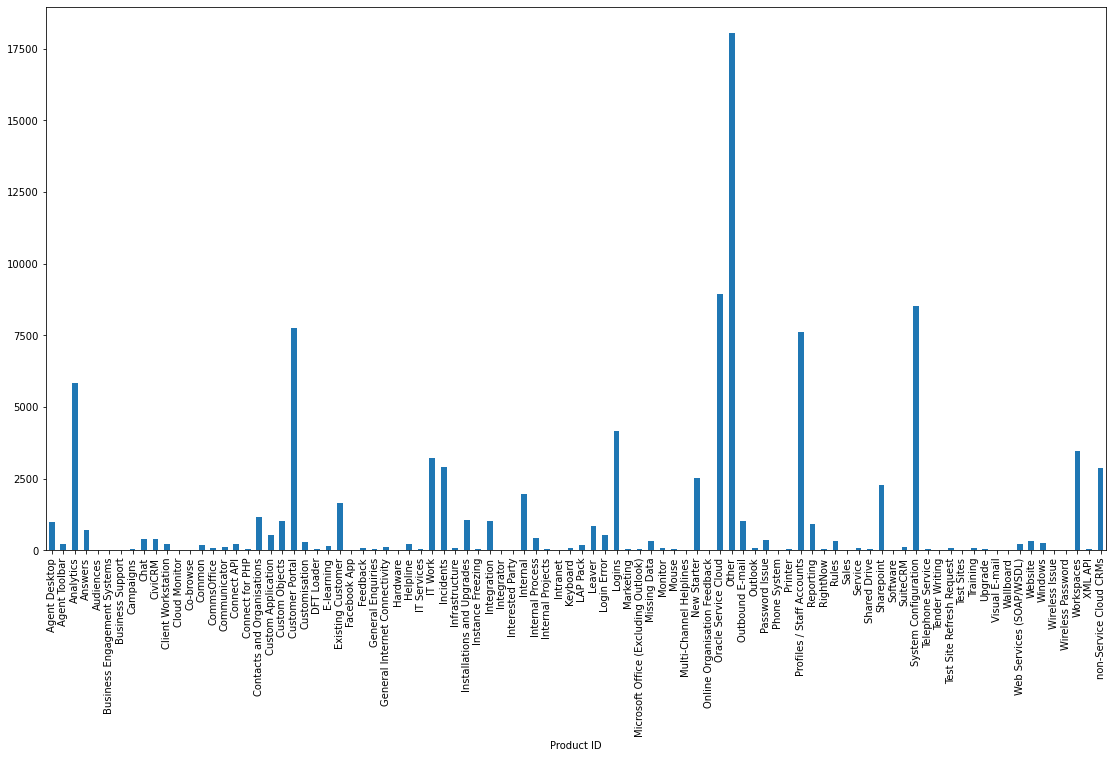

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(19,10))
f3.groupby('Product ID').Text.count().plot.bar(ylim=0)
plt.show()

In [48]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(f3.Text)
labels = f3.pro_id
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 98083 complaints is represented by 89660 features (TF-IDF score of unigrams and bigrams)


In [49]:
N = 3
for ProductID, pro_id in sorted(pro_to_id.items()):
    features_chi2 = chi2(features, labels == pro_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(ProductID))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Agent Desktop:
  * Most Correlated Unigrams are: requeue, reject, benelovent
  * Most Correlated Bigrams are: accept reject, cr pharmacist, tls network

==> Agent Toolbar:
  * Most Correlated Unigrams are: toolbar, shoretel, lunchbreak
  * Most Correlated Bigrams are: rbl scr, logging going, going lunchbreak

==> Analytics:
  * Most Correlated Unigrams are: reports, monthly, report
  * Most Correlated Bigrams are: scheduled report, monthly reports, sla report

==> Answers:
  * Most Correlated Unigrams are: bingo, gamesys, hits
  * Most Correlated Bigrams are: bingo answer, hits report, answer hits

==> Audiences:
  * Most Correlated Unigrams are: en, translation, incorrcet
  * Most Correlated Bigrams are: translation chat, en translation, closed incorrcet

==> Business Engagement Systems:
  * Most Correlated Unigrams are: betfair, visitor, brocwing
  * Most Correlated Bigrams are: url rule, brocwing page, visitor brocwing

==> Business Support:
  * Most Correlated Unigrams are: in


==> Missing Data:
  * Most Correlated Unigrams are: factsheets, tsn, stcuk
  * Most Correlated Bigrams are: incident ha, raising rightnow, ha factsheets

==> Monitor:
  * Most Correlated Unigrams are: mathew, computers, shaky
  * Most Correlated Bigrams are: main screen, screen shaky, computers new

==> Mouse:
  * Most Correlated Unigrams are: mice, ally, mouse
  * Most Correlated Bigrams are: gone missing, mouse hi, new mouse

==> Multi-Channel Helplines:
  * Most Correlated Unigrams are: helplines, hospital, leicester
  * Most Correlated Bigrams are: university hospital, hospital leicester, amica university

==> New Starter:
  * Most Correlated Unigrams are: ready, mh, starter
  * Most Correlated Bigrams are: mh ready, starter form, new starter

==> Online Organisation Feedback:
  * Most Correlated Unigrams are: st, weekly, giles
  * Most Correlated Bigrams are: update sent, trust weekly, weekly update

==> Oracle Service Cloud:
  * Most Correlated Unigrams are: spambrella, nee, com

In [50]:
X=f3['Text']
y=f3['Product ID']

In [51]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state = 42)

In [54]:
"""
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
"""

"\nmodels = [\n    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),\n    LinearSVC(),\n    MultinomialNB(),\n    LogisticRegression(random_state=0),\n]\n\n# 5 Cross-validation\nCV = 5\ncv_df = pd.DataFrame(index=range(CV * len(models)))\n\nentries = []\nfor model in models:\n    model_name = model.__class__.__name__\n    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)\n    for fold_idx, accuracy in enumerate(accuracies):\n        entries.append((model_name, fold_idx, accuracy))\n    \ncv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])\n"

In [55]:
"""
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc
"""

"\nmean_accuracy = cv_df.groupby('model_name').accuracy.mean()\nstd_accuracy = cv_df.groupby('model_name').accuracy.std()\n\nacc = pd.concat([mean_accuracy, std_accuracy], axis= 1, \n          ignore_index=True)\nacc.columns = ['Mean Accuracy', 'Standard deviation']\nacc\n"

In [56]:
"""
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);
"""

'\nplt.figure(figsize=(8,5))\nsns.boxplot(x=\'model_name\', y=\'accuracy\', \n            data=cv_df, \n            color=\'lightblue\', \n            showmeans=True)\nplt.title("MEAN ACCURACY (cv = 5)\n", size=14);\n'

In [57]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               f3.index, test_size=0.15, 
                                                               random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.58      0.87      0.70      2733
           2       0.00      0.00      0.00        12
           3       1.00      0.17      0.29        12
           4       0.00      0.00      0.00         1
           5       0.85      0.41      0.56        41
           6       0.78      0.16      0.26        44
           7       0.00      0.00      0.00        14
           8       1.00      0.13      0.23        61
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.86      0.46      0.60        26
          12       0.00      0.00      0.00         6
          13       1.00      0.63      0.77        75
          14       0.79      0.30      0.44       102
          15       0.00      0.00      0.00         5
          16       0.85      0.88      0.86      116

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 1)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LogisticRegression().fit(tfidf_vectorizer_vectors, y_train)

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
new_complaint = """Good morning,I have been locked out of my Right Now account, please can you assist?Many thanksHelenHelen TesterWellbeing CoordinatorPharmacist Support5th Floor196 DeansgateManchesterM3 3WFDirect: 0161 441 0811Enquiry Line: 0808 168 2233Website: www.pharmacistsupport.org<http://www.pharmacistsupport.org/>NEW Charity Number:Pharmacist Support is a charitable company limited by guarantee registered in England and Wales with company number 9237609 and charity number 1158974."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Profiles / Staff Accounts']
